### Feature importance code example ###

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [2]:
# Create a random dataset with categorical features

# Set random seed for reproducibility
np.random.seed(0)

# Define the number of samples
num_samples = 1000

# Define the categorical feature names
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']

# Generate random categorical data for each feature
features = {
    'Feature1': np.random.choice(['A', 'B', 'C'], size=num_samples),
    'Feature2': np.random.choice(['X', 'Y', 'Z'], size=num_samples),
    'Feature3': np.random.choice(['Red', 'Green', 'Blue'], size=num_samples),
    'Feature4': np.random.choice(['Yes', 'No', 'Maybe'], size=num_samples),
    'Feature5': np.random.choice(['High', 'Medium', 'Low'], size=num_samples)
}

# Define the class labels
classes = np.random.choice([0, 1, 2], size=num_samples)

# Create a DataFrame from the generated data
data = pd.DataFrame(features)
data['Class'] = classes

# Display the first few rows of the dataset
print(data.head())


  Feature1 Feature2 Feature3 Feature4 Feature5  Class
0        A        Y    Green    Maybe      Low      2
1        B        Y    Green       No   Medium      2
2        A        Y      Red      Yes   Medium      2
3        B        Y    Green    Maybe     High      0
4        B        X      Red       No   Medium      0


In [3]:
# Numerically encode data

encoder = OrdinalEncoder() # Create an ordinal encoder
encoded_features = encoder.fit_transform(data[feature_names]) # Fit and transform the data

print(f"Encoded Features:\n{feature_names}") # Display the encoded feature names

Encoded Features:
['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']


In [4]:
# Combine encoded features with the original dataset
data_encoded = pd.concat([data.drop(feature_names, axis=1), pd.DataFrame(encoded_features, columns=feature_names)], axis=1) # Combine the features and the label column with encoded features
print(data_encoded) # Display the first few rows of the encoded dataset

# Prepare the features and target variables by seperating X and y
X = data_encoded.drop('Class', axis=1) # Features
y = data_encoded['Class'] # Target variable (label)

rf = RandomForestClassifier() # Create a Random Forest classifier
rf.fit(X, y) # Fit the classifier to the data

     Class  Feature1  Feature2  Feature3  Feature4  Feature5
0        2       0.0       1.0       1.0       0.0       1.0
1        2       1.0       1.0       1.0       1.0       2.0
2        2       0.0       1.0       2.0       2.0       2.0
3        0       1.0       1.0       1.0       0.0       0.0
4        0       1.0       0.0       2.0       1.0       2.0
..     ...       ...       ...       ...       ...       ...
995      2       2.0       0.0       1.0       2.0       0.0
996      0       1.0       2.0       0.0       2.0       1.0
997      2       0.0       0.0       1.0       0.0       0.0
998      1       2.0       1.0       1.0       1.0       0.0
999      2       2.0       2.0       1.0       0.0       2.0

[1000 rows x 6 columns]


RandomForestClassifier()

In [5]:
# Extract feature importances
importances = rf.feature_importances_ # Extract feature importances
print(f"Feature Importances:\n{importances}") # Display the feature importances

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1] # Find indexes in ascending order of importances

# Create list of feature names in ascending order
names = []

for i in sorted_indices: # Loop through the sorted indices
    names.append(feature_names[i]) # Append the feature names to the list
    
print(f"\nAscending order feature names:\n{names}") # Display the feature names in ascending order

Feature Importances:
[0.18184152 0.1876416  0.2055638  0.21303478 0.21191829]

Ascending order feature names:
['Feature4', 'Feature5', 'Feature3', 'Feature2', 'Feature1']


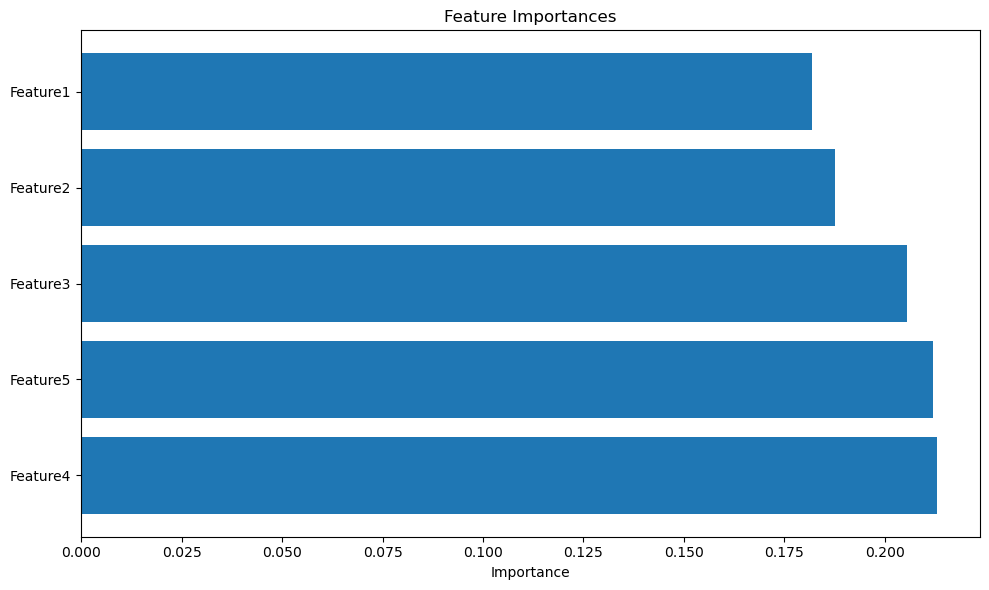

In [6]:
# Create a horizontal bar chart for feature importances
plt.figure(figsize=(10, 6)) # Set the figure size
plt.title('Feature Importances') # Set the title of the plot
plt.barh(range(len(importances)), importances[sorted_indices], align='center') # hoizontal bar chart
plt.yticks(range(len(importances)),names) # Set the y-ticks
plt.xlabel('Importance') # Set the x-label
plt.tight_layout() # Set the layout
plt.show() # Display the plot